In [2]:

import pandas as pd
import re
import numpy as np
import nltk.corpus

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import nltk 
nltk.download('punkt') 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import spacy
from string import digits
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
with open('[Martinus Nijhoff Philosophy Texts 2] J. N. Mohanty (auth.), William McKenna, Robert M. Harlan, Laurence E. Winters (eds.) - Apriori and World_ European Contributions.txt','r') as f:
    data=f.readlines()  

In [8]:
data

['ence of the consciousness of the \n',
 'other which is more direct than the consciousness of the self. \n',
 'As a consequence, the only truly essential difference which Husserl \n',
 'maintained between the notion of individuality and that of collectivity is \n',
 'effaced, and one has left, on both sides, only more or less systematic sets of \n',
 'conscious phenomena, intrinsically bound to each other: the individual, like \n',
 'the collectivity, is "legion." \n',
 'It is evident that the individual grouping serves as the model of the social \n',
 'grouping. H usserl did not definitely free himself of individualism, failing to \n',
 'give a clear conception of the individual in relation to society. \n',
 'We must also assert that he did not avoid a restoration of organicism. The \n',
 'clearest manifestation of this deviation may be recognized in the metaphysical \n',
 'extensions which he believed were proper to furnish to his phenomenology. \n',
 'The world is ultimately presen

In [9]:
# for i in range(len(data)):
#     string = data[i]
#     ls_alpha = [i for i in string if not i.isdigit()]
#     data[i] =ls_alpha
df = pd.DataFrame(columns=['text'],data = data)
df

,text
0,ence of the consciousness of the \n
1,other which is more direct than the consciousn...
2,"As a consequence, the only truly essential dif..."
3,maintained between the notion of individuality...
4,"effaced, and one has left, on both sides, only..."
...,...
10418,"I. This situation will change, perhaps, when t..."
10419,transcribed - more than a-thousand pages in sh...
10420,and conserved at Louvain. \n
10421,"2. Cf. especially the paragraph: ""Die Person i..."


In [10]:

df['text_clean'] = df['text'].str.lower()
df['text_clean'] = df['text_clean'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
# remove numbers
df['text_clean'] = df['text_clean'].apply(lambda elem: re.sub(r"\d+", "", elem))

In [11]:
df

,text,text_clean
0,ence of the consciousness of the \n,ence of the consciousness of the
1,other which is more direct than the consciousn...,other which is more direct than the consciousn...
2,"As a consequence, the only truly essential dif...",as a consequence the only truly essential diff...
3,maintained between the notion of individuality...,maintained between the notion of individuality...
4,"effaced, and one has left, on both sides, only...",effaced and one has left on both sides only mo...
...,...,...
10418,"I. This situation will change, perhaps, when t...",i this situation will change perhaps when the ...
10419,transcribed - more than a-thousand pages in sh...,transcribed more than athousand pages in shor...
10420,and conserved at Louvain. \n,and conserved at louvain
10421,"2. Cf. especially the paragraph: ""Die Person i...",cf especially the paragraph die person in per...


In [12]:
# ps= PorterStemmer()
# nltk.download('words')
# words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\maxme\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
# df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if not word in set(stopwords.words("english"))]))
# df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if not word in set(stopwords.words("english"))]))
# df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join(word for word in  x.split() if word in words))
# # df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word != '')]))


KeyboardInterrupt: 

או \ גם

In [ ]:
# df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if not word in set(stopwords.words("english"))]))


או \ גם

In [ ]:
# df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join(word for word in  x.split() if word in words))

In [ ]:
# listw=('a','b','c','d','e','f','g','h','q','w','r','t','y','u','o','p','s','j','k','l','z','x','v','n','m')
# for i in range(len(df['text_clean'])):
#     try:
#         df.reset_index(inplace= True, drop=True)
#         if df['text_clean'][i] in listw:
#             print(df['text_clean'][i])
#             df.drop([i],inplace=True,axis=0)
#         if df['text_clean'][i] =='':
#             print(df['text_clean'][i])
#             df.drop([i],inplace=True,axis=0)
#         if df['text_clean'][i] ==' ':
#             print(df['text_clean'][i])
#             df.drop([i],inplace=True,axis=0)
#     except:
#          df.reset_index(inplace= True, drop=True)
# df.reset_index(inplace= True, drop=True)

In [ ]:
# df['text_tokens'] = df['text_clean'].apply(lambda x: word_tokenize(x))
# df.head()

In [ ]:
# df.dropna(inplace=True)

In [ ]:
df

# Start Here

In [14]:
vec = CountVectorizer(ngram_range = (2, 5),stop_words='english')
list_= list()
list_=df['text_clean'].tolist()
X_train = vec.fit_transform(list_)
print(vec)
bigram_df=pd.DataFrame(X_train.toarray(), columns=vec.get_feature_names())

CountVectorizer(ngram_range=(2, 5), stop_words='english')


,abandon domain,abandon domain logic,abandon domain logic implies,abandon domain logic implies ground,abandon motive,abandon motive favor,abandoned concept,abandoned covertly,abandoned covertly specific,abandoned covertly specific science,...,zusammenhang spatial,zusammenhang spatial position,zusammenhang spatial position spatial,zusammenhang spatial position spatial extension,zusammenstellung mean,zusammenstellung mean putting,zweites buch,zweites buch husserliana,zweites buch husserliana iv,zweites buch husserliana iv ed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
bigram_df.to_csv("bigram.csv")

KeyboardInterrupt: 

In [10]:
vec1 = CountVectorizer(ngram_range = (1, 1),stop_words='english')
list_= list()
list_=df['text_clean'].tolist()
X_train1 = vec1.fit_transform(list_)
df_c=pd.DataFrame(X_train1.toarray(), columns=vec1.get_feature_names())

In [11]:
listcount=list()
j=0
for val in df_c:
    listcount.append([val,0])
    
    for i in range(len(df_c[val])):
        listcount[j][1] +=df_c[val][i]
    j+=1

In [12]:
listcount.sort(key=lambda y: y[1],reverse= True)

In [19]:
textfile = open("file_common_words.txt", "w")
for i in range(len(listcount)):
    
    textfile.write(listcount[i][0])
    textfile.write(' ')
    textfile.write(str(listcount[i][1]))
    textfile.write(', ')

# Not in use

In [13]:
text = " ".join(title for title in df.text_clean)


split_it = text.split()
  
Counter = Counter(split_it)
  

most_occur = Counter.most_common(4)
  


In [14]:
most_occur

[('the', 9196), ('of', 6387), ('is', 3252), ('in', 2913)]

6767


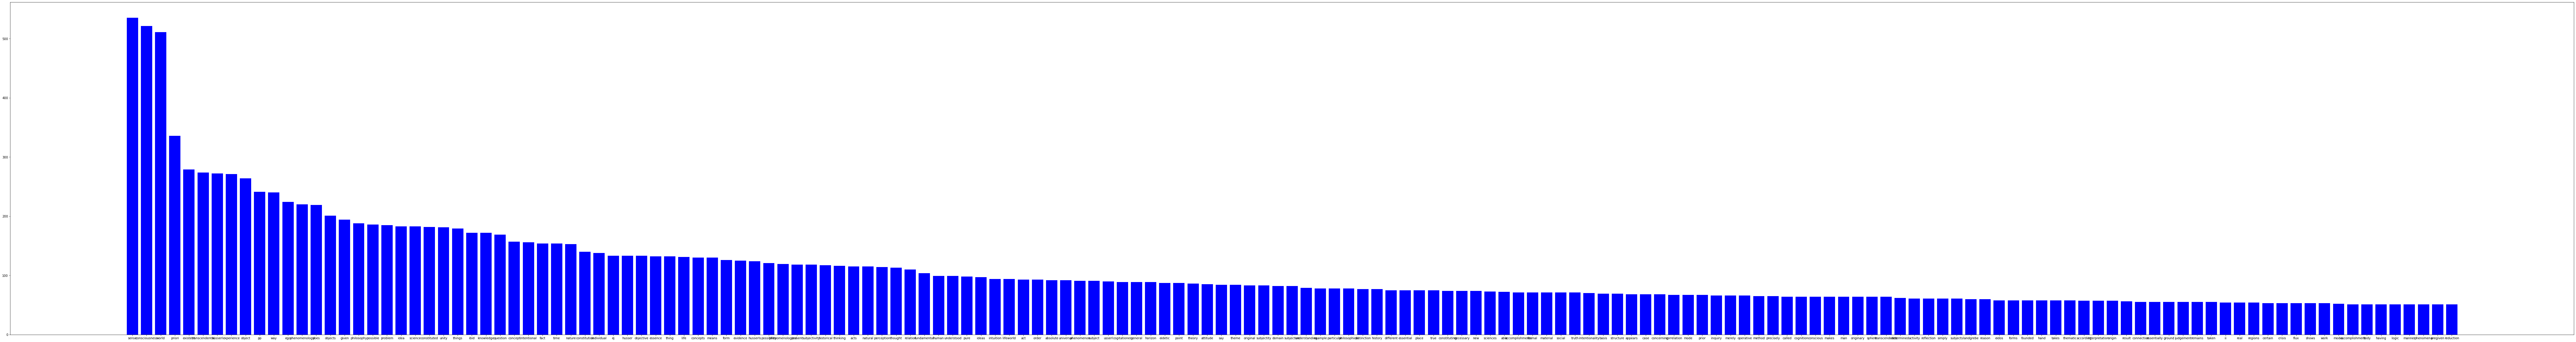

In [80]:
word = []
frequency = []
plt.figure(figsize=(150,20))
print(len(listcount))
for i in range(len(listcount)):
  if listcount[i][1] > 50:
    word.append(listcount[i][0])
    frequency.append(listcount[i][1])

plt.bar(word, frequency, color='b')
plt.show()

In [77]:
text = "".join(str(title) for i in range(len(listcount)) for title in listcount[i][0]+', ' )

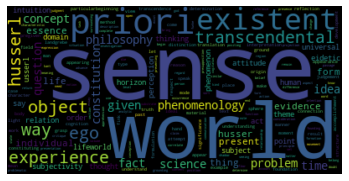

In [79]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()